# Decision Tree Classifier

In this notebook, you will implement your own decision tree algorithm for the classification problem. You are supposed to learn:

* How to prepare the dataset for training and testing of the model (i.e. decision tree).
* How to implement the decision tree learning algorithm.
* How to classify unseen samples using your model (i.e. trained decision tree).
* How to evaluate the performance of your model.

**Instructions:**

* Read carefuly through this notebook. Be sure you understand what is provided to you, and what is required from you.
* Place your code/edit only in sections annotated with `### START CODE HERE ###` and `### END CODE HERE ###`.
* Use comments whenever the code is not self-explanatory.
* Submit an executable notebook (`*.ipynb`) with your solution to BlackBoard.

Enjoy :-)

In [14]:
import pandas as pd
import numpy as np

In [15]:
# set all the seeds
import random
from sklearn.utils import check_random_state

# Set the seed value
seed_value = 42

# Set numpy seed
np.random.seed(seed_value)

# Set python random seed
random.seed(seed_value)

# Set sklearn seed
check_random_state(seed_value)

RandomState(MT19937) at 0x7FE7F7E38840

## Problem

You are given a dataset `mushrooms.csv` with characteristics/attributes of mushrooms, and your task is to implement, train and evaluate a decision tree classifier able to say whether a mushroom is poisonous or edible based on its attributes.

## Dataset

The dataset of mushroom characteristics is freely available at [Kaggle Datasets](https://www.kaggle.com/uciml/mushroom-classification) where you can find further information about the dataset. It consists of 8124 mushrooms characterized by 23 attributes (including the class). Following is the overview of attributes and values:

* class: edible=e, poisonous=p
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Let's load the dataset into so called Pandas dataframe.

In [16]:
mushrooms_df = pd.read_csv('mushrooms.csv')

Now we can take a closer look at the data.

In [17]:
mushrooms_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


You can also print an overview of all attributes with the counts of unique values.

In [18]:
mushrooms_df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


The dataset is pretty much balanced. That's a good news for the evaluation.

## Dataset Preprocessing

As our dataset consist of nominal/categorical values only, we will encode the strings into integers which again should simplify our implementation.

In [19]:
def encode_labels(df):
    import sklearn.preprocessing
    encoder = {}
    for col in df.columns:
        le = sklearn.preprocessing.LabelEncoder()
        le.fit(df[col])
        df[col] = le.transform(df[col])
        encoder[col] = le
    return df, encoder

mushrooms_encoded_df, encoder = encode_labels(mushrooms_df)

In [20]:
mushrooms_encoded_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## Dataset Splitting

Before we start with the implementation of our decision tree algorithm we need to prepare our dataset for the training and testing.

First, we divide the dataset into attributes (often called features) and classes (often called targets). Keeping attributes and classes separately is a common practice in many implementations. This should simplify the implementation and make the code understandable.

In [21]:
X_df = mushrooms_encoded_df.drop('class', axis=1)  # attributes
y_df = mushrooms_encoded_df['class']  # classes
X_array = X_df.values
y_array = y_df.values

And this is how it looks like.

In [22]:
print('X =', X_array)
print('y =', y_array)

X = [[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]
y = [1 0 0 ... 0 1 0]


Next, we need to split the attributes and classes into training sets and test sets.

**Exercise:**

Implement the holdout splitting method with shuffling.

In [23]:
def train_test_split(X, y, test_size=0.2):
    """
    Shuffles the dataset and splits it into training and test sets.

    :param X
        attributes
    :param y
        classes
    :param test_size
        float between 0.0 and 1.0 representing the proportion of the dataset to include in the test split
    :return
        train-test splits (X-train, X-test, y-train, y-test)
    """
    ### START CODE HERE ###
    n_samples = len(X) # Number of samples
    
    # Create an array of indices and shuffle them
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Calculate the split point
    test_samples = round(n_samples * test_size) # Round to the nearest integer
    
    # Split into training and test sets
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]
    
    # Create the training and test sets
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    ### END CODE HERE ###
    return X_train, X_test, y_train, y_test

Let's split the dataset into training and validation/test set with 67:33 split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, 0.33)

In [25]:
print('X_train =', X_train)
print('y_train =', y_train)
print('X_test =', X_test)
print('y_test =', y_test)

X_train = [[2 0 2 ... 2 5 0]
 [5 0 3 ... 2 4 0]
 [5 0 2 ... 3 5 0]
 ...
 [2 3 4 ... 3 5 4]
 [3 2 2 ... 7 4 4]
 [3 0 3 ... 7 2 1]]
y_train = [0 1 0 ... 0 1 0]
X_test = [[2 0 4 ... 3 3 1]
 [2 2 2 ... 7 4 2]
 [5 3 4 ... 7 4 2]
 ...
 [5 0 4 ... 2 5 0]
 [5 3 7 ... 1 4 0]
 [2 0 4 ... 3 5 0]]
y_test = [0 1 1 ... 0 0 0]


A quick sanity check...

In [26]:
assert len(X_train) == len(y_train)
assert len(y_train) == 5443
assert len(X_test) == len(y_test)
assert len(y_test) == 2681

## Training

**Exercise:**

Implement an algorithm for fitting (also called training or inducing) a decision tree.

* You have a free hand regarding the generation of candidate splits (also called attribute test conditions).
* Measure the degree of impurity (Gini) to select the best split.

In [40]:
# Use this section to place any "helper" code for the `fit()` function.

### START CODE HERE ###
# Calculate Gini impurity of a set of labels

### END CODE HERE ###

In [28]:
def fit(X, y):
    """
    Function implementing decision tree induction.

    :param X
        attributes
    :param y
        classes
    :return
        trained decision tree (model)
    """
    ### START CODE HERE ###
    from sklearn.tree import DecisionTreeClassifier
    
    # Create a Decision Tree classifier
    classifier = DecisionTreeClassifier(criterion='gini', random_state=42) # Using Gini impurity as the criterion
    
    # Train the model on the data
    classifier.fit(X, y)
    ### END CODE HERE ###
    return classifier

In [29]:
model = fit(X_train, y_train)

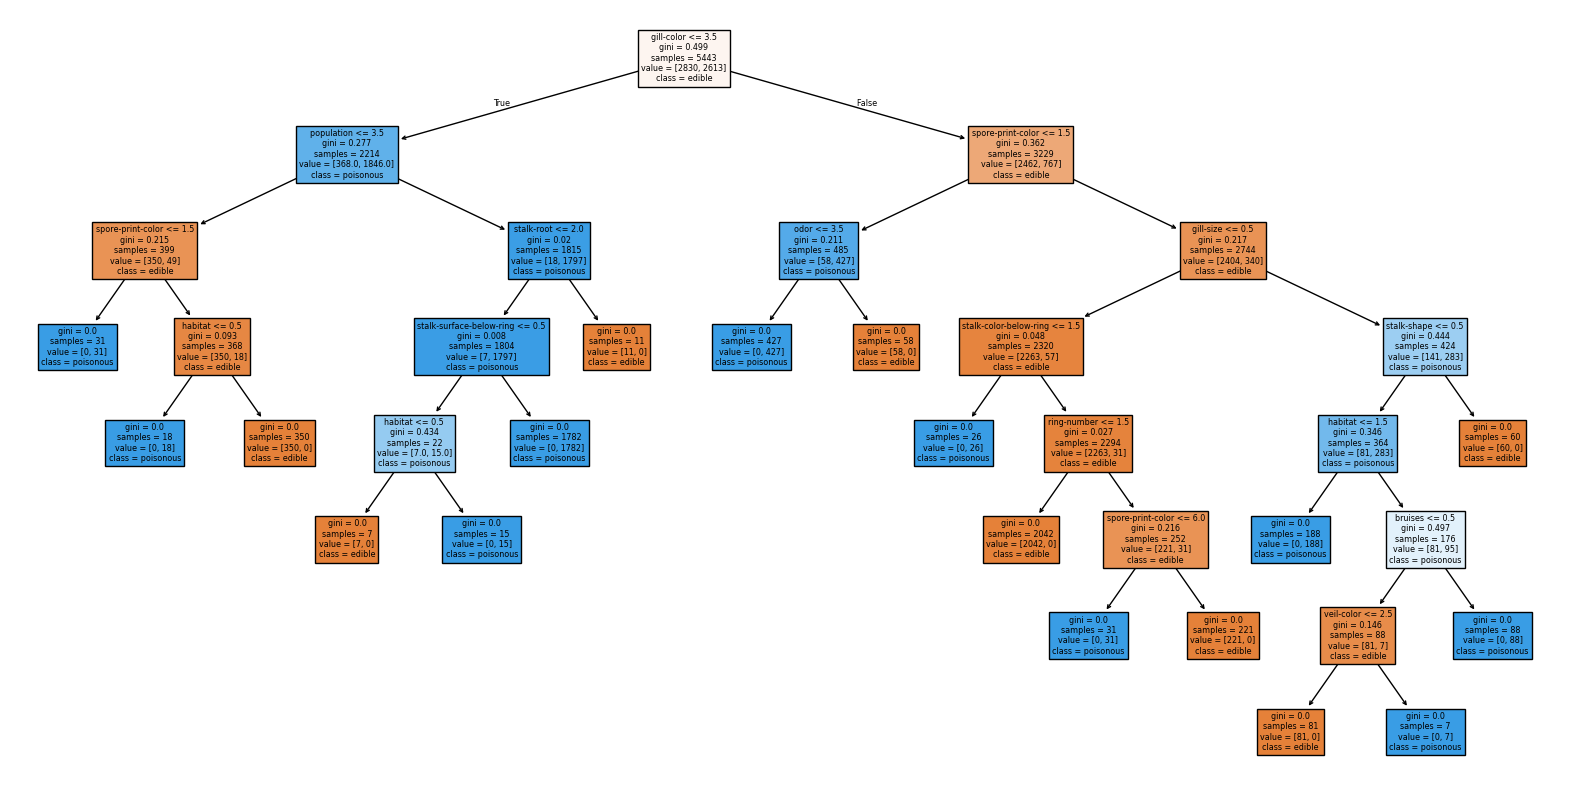

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt

def visualize_tree(model, feature_names=None, class_names=None):
    plt.figure(figsize=(20, 10))
    tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

# Visualize the decision tree
feature_names = X_df.columns
class_names = ['edible', 'poisonous']
visualize_tree(model, feature_names, class_names)

## Prediction/Deduction

At this moment we should have trained a decision tree (our model). Now we need an algorithm for assigning a class given the attributes and our model.

**Exercise:**

Implement an algorithm deducing class given the attributes and the model.

* `X` is a matrix of attributes of one or more instances for classification.

In [ ]:
# Use this section to place any "helper" code for the `predict()` function.

### START CODE HERE ###

### END CODE HERE ###

In [30]:
def predict(X, model):
    """
    Function for generating predictions (classifying) given attributes and model.

    :param X
        attributes
    :param model
        model
    :return
        predicted classes (y_hat)
    """
    ### START CODE HERE ###
    # Use the trained model to make predictions
    y_hat = model.predict(X)
    ### END CODE HERE ###
    return y_hat

Let's classify the instances of our test set.

In [31]:
y_hat = predict(X_test, model)

First ten predictions of the test set.

In [32]:
y_hat[:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

## Evaluation

Now we would like to assess how well our decision tree classifier performs.

**Exercise:**

Implement a function for calculating the accuracy of your predictions given the ground truth and predictions.

In [33]:
def evaluate(y_true, y_pred):
    """
    Function calculating the accuracy of the model given the ground truth and predictions.

    :param y_true
        true classes
    :param y_pred
        predicted classes
    :return
        accuracy
    """
    ### START CODE HERE ###
    correct = 0
    
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1 # Count the number of correct predictions
    
    # Calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct / len(y_true)
    ### END CODE HERE ###
    return accuracy

In [34]:
accuracy = evaluate(y_test, y_hat)
print('accuracy =', accuracy)

accuracy = 1.0


How many items where misclassified?

In [35]:
print('misclassified =', sum(abs(y_hat - y_test)))

misclassified = 0


How balanced is our test set?

In [36]:
np.bincount(y_test)

array([1378, 1303])

If it's balanced, we don't have to be worried about objectivity of the accuracy metric.

---

Congratulations! At this point, hopefully, you have successufuly implemented a decision tree algorithm able to classify unseen samples with high accuracy.

✌️